In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("C:\\Users\\jyoti\\OneDrive\\Desktop\\New folder\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [4]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.compose import ColumnTransformer

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(331, 3)

In [7]:
x = df.iloc[: , 1:]  # independent data

In [8]:
y = df.iloc[:,0] # dependent data

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size =0.2)

In [10]:
x_train.head(3)

,Age,Fare
51,27.0,15.0333
25,50.0,14.5000
114,63.0,221.7792


In [11]:
clf = DecisionTreeClassifier()

clf.fit(x_train , y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(x_test)

In [13]:
accuracy_score(y_test , y_pred)

0.6268656716417911

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier() , x, y, cv=10 , scoring="accuracy"))

0.5621212121212121

In [15]:
kbin_age = KBinsDiscretizer(n_bins = 15 , encode='ordinal', strategy='quantile')

In [16]:
kbin_fare = KBinsDiscretizer(n_bins = 15 , encode='ordinal ', strategy ='quantile')

In [17]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [18]:
trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal ', n_bins=15),
                                 [1])])

In [20]:
# x_train_trf = trf.fit_transform(x_train)

In [ ]:
x_test_trf = trf.transform(x_test)

In [23]:
trf.fit_transform(x_train)

InvalidParameterError: The 'encode' parameter of KBinsDiscretizer must be a str among {'ordinal', 'onehot', 'onehot-dense'}. Got 'ordinal ' instead.

In [24]:
df= pd.read_csv("C:\\Users\\jyoti\\OneDrive\\Desktop\\New folder\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [25]:
df.head(2)

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000


In [26]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.compose import ColumnTransformer

In [27]:
df = df.dropna()

In [28]:
df.shape

(331, 3)

In [30]:
x = df.iloc[: , 1:]
x

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875
...,...,...
409,3.0,13.7750
411,37.0,90.0000
412,28.0,7.7750
414,39.0,108.9000


In [33]:
y = df.iloc[: , 0]
# y

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [35]:
kbin_age = KBinsDiscretizer(n_bins = 15,
                           encode = 'ordinal',
                           strategy = 'quantile')

In [36]:
kbin_age

KBinsDiscretizer(encode='ordinal', n_bins=15)

In [37]:
kbin_fare = KBinsDiscretizer(n_bins = 15,
                           encode = 'ordinal',
                           strategy = 'quantile')

In [38]:
trf = ColumnTransformer([
    ('first', kbin_age , [0]),
    ('second', kbin_fare , [1])
])

In [39]:
trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])

In [40]:
x_train_trf = trf.fit_transform(x_train) 

In [41]:
x_test_trf = trf.transform(x_test) 

In [42]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.33      , 13.53333333, 18.        , 20.        , 22.        ,
              24.        , 25.2       , 27.73333333, 30.        , 32.        ,
              36.        , 39.        , 43.8       , 47.93333333, 55.        ,
              76.        ])                                                   ],
      dtype=object)

In [43]:
output = pd.DataFrame({
    'age': x_train['Age'],
    'age_trf': x_train_trf[:,0],
    'Fare': x_train['Fare'],
    'Fare_trf': x_train_trf[:,1]
})

In [44]:
output

,age,age_trf,Fare,Fare_trf
281,0.75,0.0,13.7750,6.0
96,76.00,14.0,78.8500,13.0
341,32.00,9.0,7.5792,1.0
18,27.00,6.0,7.9250,3.0
26,22.00,4.0,61.9792,12.0
...,...,...,...,...
237,20.00,3.0,7.2250,0.0
86,27.00,6.0,7.8792,2.0
134,43.00,11.0,7.8958,3.0
345,16.00,1.0,7.6500,1.0


In [45]:
output['age_labels']= pd.cut(x= x_train['Age'], bins = trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels']= pd.cut(x= x_train['Fare'], bins = trf.named_transformers_['second'].bin_edges_[0].tolist())
                    

In [47]:
output.sample(5)

,age,age_trf,Fare,Fare_trf,age_labels,fare_labels
128,42.0,11.0,13.0000,6.0,"(39.0, 43.8]","(12.253, 13.0]"
43,30.0,8.0,13.0000,6.0,"(27.733, 30.0]","(12.253, 13.0]"
99,33.0,9.0,8.0500,3.0,"(32.0, 36.0]","(7.896, 8.662]"
90,22.0,4.0,13.9000,6.0,"(20.0, 22.0]","(13.0, 14.891]"
44,45.0,12.0,52.5542,11.0,"(43.8, 47.933]","(39.0, 58.41]"


In [48]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)

DecisionTreeClassifier()

In [49]:
y_pred2 = clf.predict(x_test_trf)

In [50]:
accuracy_score(y_test , y_pred2)

0.5970149253731343

In [51]:
x_trf = trf.fit_transform(x)

np.mean(cross_val_score(DecisionTreeClassifier() , x, y, scoring='accuracy'))

0.565083672546359

In [53]:
def discretize(bins , strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins, encode='ordinal', strategy =strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins, encode='ordinal', strategy =strategy)
    
    trf= ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second', kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,scoring='accuracy')))
    
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Age Before")
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("Age After")
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Fare Before")
    
    plt.subplot(122)
    plt.hist(x_trf[: , 1], color= 'red')
    plt.title("Fare After")
    
    plt.show()

C:\Users\jyoti\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\jyoti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyoti\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\jyoti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

0.5711442786069652


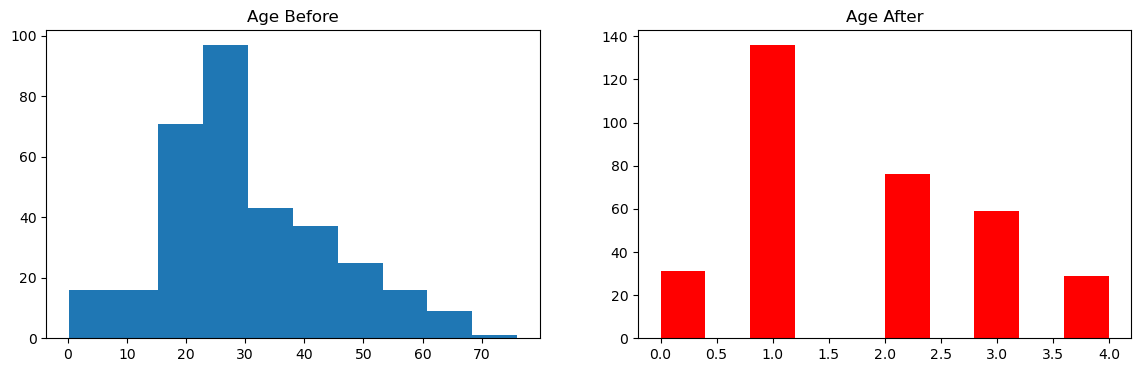

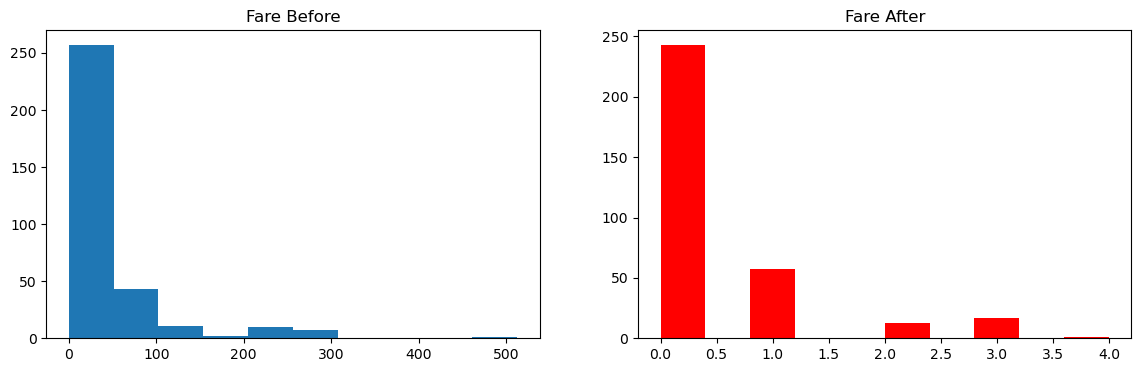

In [54]:
discretize(5 , 'kmeans')